data https://www.kaggle.com/usdot/flight-delays?select=flights.csv

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
%matplotlib inline

DATA = https://data.open-power-system-data.org/time_series/2019-06-05/time_series_60min_singleindex.csv

In [11]:
df = pd.read_csv('DATA/time_series_60min_singleindex.csv',  usecols=['utc_timestamp','AT_solar_generation_actual', 'AT_wind_onshore_generation_actual'], parse_dates =['utc_timestamp'], infer_datetime_format=True,  nrows=100000)

In [12]:
df = df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12344 entries, 87656 to 99999
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   utc_timestamp                      12344 non-null  datetime64[ns]
 1   AT_solar_generation_actual         12344 non-null  float64       
 2   AT_wind_onshore_generation_actual  12344 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 385.8 KB


In [27]:
df.set_index('utc_timestamp')

AT_solar_generation_actual  \
utc_timestamp                                     
2015-01-01 07:00:00                         2.0   
2015-01-01 08:00:00                        10.0   
2015-01-01 09:00:00                        21.0   
2015-01-01 10:00:00                        32.0   
2015-01-01 11:00:00                        37.0   
...                                         ...   
2016-05-29 10:00:00                       452.0   
2016-05-29 11:00:00                       444.0   
2016-05-29 12:00:00                       446.0   
2016-05-29 13:00:00                       402.0   
2016-05-29 14:00:00                       311.0   

                     AT_wind_onshore_generation_actual  
utc_timestamp                                           
2015-01-01 07:00:00                              109.0  
2015-01-01 08:00:00                              146.0  
2015-01-01 09:00:00                              146.0  
2015-01-01 10:00:00                              158.0  
2015-01-01 11:00:00                              187.0  
...                                                ...  
2016-05-29 10:00:00                              773.0  
2016-05-29 11:00:00                              930.0  
2016-05-29 12:00:00                              991.0  
2016-05-29 13:00:00                              930.0  
2016-05-29 14:00:00                              949.0  

[12344 rows x 2 columns]

In [14]:
df.describe()

AT_solar_generation_actual  AT_wind_onshore_generation_actual
count                12344.000000                       12344.000000
mean                    95.579067                         601.962330
std                    135.896267                         547.321393
min                      0.000000                           1.000000
25%                      0.000000                         149.000000
50%                     10.000000                         419.000000
75%                    167.000000                         930.000000
max                    610.000000                        2327.000000

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12344 entries, 87656 to 99999
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   utc_timestamp                      12344 non-null  datetime64[ns]
 1   AT_solar_generation_actual         12344 non-null  float64       
 2   AT_wind_onshore_generation_actual  12344 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 705.8 KB


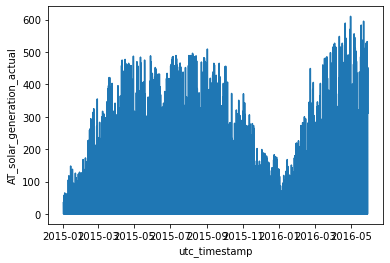

In [29]:
sns.lineplot(x='utc_timestamp', y='AT_solar_generation_actual', data=df)


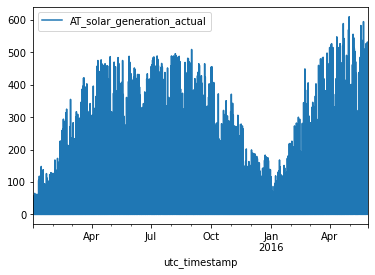

In [23]:
df.plot(x='utc_timestamp', y='AT_solar_generation_actual')

In [25]:
df.truncate(after=11500)

Empty DataFrame
Columns: [utc_timestamp, AT_solar_generation_actual, AT_wind_onshore_generation_actual]
Index: []

In [32]:
df.index[:-40]

Int64Index([87656, 87657, 87658, 87659, 87660, 87661, 87662, 87663, 87664,
            87665,
            ...
            99950, 99951, 99952, 99953, 99954, 99955, 99956, 99957, 99958,
            99959],
           dtype='int64', length=12304)

In [38]:
train = df.iloc[0:-400]
test = df.iloc[-400:]

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11944 entries, 87656 to 99599
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   utc_timestamp                      11944 non-null  datetime64[ns]
 1   AT_solar_generation_actual         11944 non-null  float64       
 2   AT_wind_onshore_generation_actual  11944 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 373.2 KB


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 99600 to 99999
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   utc_timestamp                      400 non-null    datetime64[ns]
 1   AT_solar_generation_actual         400 non-null    float64       
 2   AT_wind_onshore_generation_actual  400 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 12.5 KB
